# Practical Deep-Learning using Pytorch
* project start : 2023-03-23
* project end : 
* wirter : Int29
* github : https://github.com/int29/PDLP
* project description : 처음부터 다시 딥러닝 공부를 하면서 공부한 내용을 정리함.

## Chapter01 : classical artificial neural network(2)

### 01.XOR논리 게이트로 살펴보는 퍼셉트론(Perceptron)의 한계

AND, OR, NAND 게이트와 마찬가지로 [그림2-1] XOR문제를 퍼셉트론  통해서 해결해보자.
<div align="center">
    <img src="https://github.com/int29/PDLP/blob/main/ch01_classical_neural_network/img/02_01.png?raw=true" width="600">
    <span>[그림02-01]</span>
</div>

 직관적으로 XOR은 선형으로는 완벽하게 분리가 불가능한것을 추측해 볼 수 있으며 
<br><br><br>
<div align="center">
    <img src="https://github.com/int29/PDLP/blob/main/ch01_classical_neural_network/img/02_02.png?raw=true" width="600">
    <span>[그림02-02]</span>
</div>

코드로 위해 500회 에포크(epoch) 실행해도 50% 보다 높은 정확도를 확보하지 못한다.

In [2]:
# 01_perceptron_artificial_neuron 에서 사용한 퍼셉트론 코드
import numpy as np
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
                
    def fit(self, X, y):
        self.w_ = np.random.normal(loc=0.0, scale=0.01,size=X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

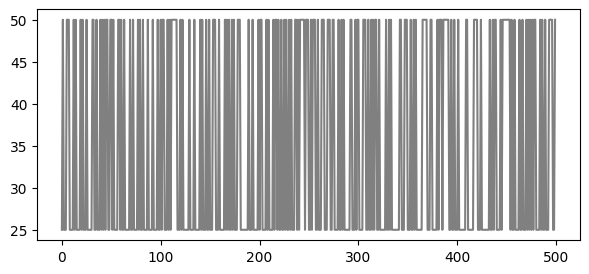

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=[7,3])

# XOR데이터 정의
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

acc_rata_list = []
for n in range(0,500):
    pct = Perceptron(eta=0.05, n_iter=n)
    pct.fit(X,y)
    
    pred = pct.predict(X)
    # accuracy
    acc_rate = int((np.equal(pred, y.reshape(1,4)).mean())*100)
    acc_rata_list.append(acc_rate)
    
plt.plot(acc_rata_list, color='gray')
plt.show()

<span>[그림2-3] Y축은 정확도(%), X축은 epoch</span>

### 02.신경망(NN:Neural Network) 이해하기

퍼셉트론은 선형 혹은 다차원(혹은 고차원)에서 초평면 분리만 가능하기 때문에 XOR과 같이 비선형 판별경계가 필요한 문제는 퍼셉트론으로 해결이 불가능하다. 이러한 비선형 문제를 해결하기 위해 신경망(ANN:Artificial Neural Network)이 탄생하였으며,<span style="font-size:70%"><1></span> 신경망은 아래와 같이 데이터가 존재하는 공간을 변경하여 선형 분리가 가능하게 할 수 있도록 데이터를 변형(transform)하여 비선형 문제를 선형으로 해결한다.<span style="font-size:70%">[3]</span>

맨 오른쪽은 2개의 경계로 구분한 것처럼 보이지만 사실 중간 그림처럼 2차원 평면을 구부려 1개의 선형 결정경계를 이용해 구분할 수 있도록 신경망이 변형된(transformed) 데이터를 학습에 활용하는 것이다.<span style="font-size:70%">[4]</span> 즉 특징을 다시 표현하는 중간 단계가 존재하고 중간 단계의 데이터를 통해서 학습을 진행하는 것이다.
    
<br><br><br>
<div align="center">
    <img src="https://github.com/int29/PDLP/blob/main/ch01_classical_neural_network/img/02_04.png?raw=true" width="600">
    <span>[그림02-04]</span>
</div>

이를 위해 신경망은 아래 [그림2-2]처럼 왼쪽부터 퍼셉트론이 입력-출력 구조로만 이루어졌던데 반해, 입력층, 은닉층, 출력층, 총 3단계로 구성되어 있다. <span style="font-size:70%">[1]</span> 결론부터 말하자면 은닉층을 통해 자동으로 데이터의 변형하고 특징을 추출&학습한다.    
    
<br><br><br>
<div align="center">
    <img src="https://github.com/int29/PDLP/blob/main/ch01_classical_neural_network/img/02_05.png?raw=true" width="600">
    <span>[그림02-05]</span>
</div>
어떻게 은닉층에서 데이터가 변형되고 선형분리가 가능해지는지 구체적으로 알아보기 전에 먼저 신경망에 대한 기본적인 구조를 살펴보자.

### (2-1) 입력층 (input layer)

**입력층(input layer)**은 데이터를 입력받는 뉴런들이 존재하는 층(layer)을 말한다. 입력층에서는 퍼셉트론에서 살펴본 것처럼 활성화 함수를 통한 학습과정은 없고 현재까지는 데이터를 은닉층(hidden layer)으로 전달하는 역할만 한다.

각 데이터마다 정의하기 나름이지만 데이터의 크기와 입력층의 뉴런수는 일치해야한다. 예를들어 이미지 테스크(TASK)에서 10x10크기의 이미지를 작업하려면 입력층의 뉴런은 100(10x10)개의 뉴런이 필요하다.<span style="font-size:70%"><2></span>

단 신경망에서 단일 뉴런, 노드라는 용어를 사용하기도 하지만 유닛(units)이라고 표현하기도 한다. 이후 문서에서는 뉴런 대신 유닛으로 표현할 예정이다.

### (2-2) 은닉층(**Hidden Layer**)

**은닉층(Hidden Layer)**은 입력층으로 부터 텐서(혹은 벡터)로 변환된 데이터를 전달받아 최적 파라미터(가중치($w$),편향)($b$)) 계산을 통한 학습이 이루어지는 단계이다. 

개별 은닉층의 계산후에는 다음 은닉층으로 결과를 전달해 동일한 계산을 이어가며 이를 통해 데이터에 존재하는 복잡한 패턴을 추출한다. 즉 데이터의 패턴을 파라미터로 저장 및 표현하는 실제 학습하는 이루어지는 층이며, 최종 결과값을 출력층(Output layer)로 전달하는 역할을 한다.

따라서 모든 층을 통틀어 가장 복잡한 계산이 발생한다. 신경망의 깊이(Depth)는 주로 은닉층의 수가 영향을 주로 미치기고 데이터의 복잡한 패턴을 학습하려면 자연스래 은닉층의 깊이(길이)가 깊어질 수 밖에 없다. 따라서 딥러닝(Deep Learning)에서 deep이라는 표현을 사용하는 것이다.<span style="font-size:70%">[5]</span>

신경망의 깊이와 각 층의 유닛수는 신경망의 용량(capacity)을 결정하는 중요한 요소이며, 일반적으로 신경망의 용량이 클 수록 복잡하고 심오한 데이터속 패턴을 더 잘 학습하고 모델의 성능을 비선형적으로 향상시키는 것으로 알려져 있다.<span style="font-size:70%">[2]</span>

하지만 은닉층은 제한 없이 증가시키는 것은 과적합(overfitting), 그래디언트 소실(vanishing gradient) 문제 등의 이슈가 발생할 수 있다. 따라서 무한정 늘리지는 않고 드롭아웃(노드버리기)과 같이 신경망의 깊이나 은닉층을 제한하는 하이퍼파라미터 튜닝과정을 거친다.<span style="font-size:70%">[6]</span>

### (2-3) **출력층(Output Layer)**

**출력층(Output Layer)**은 신경망의 예측을 제공하는 가장 마지막 층이다. 출력층의 뉴런 수는 입력층과 마찬가지로 label수에 따라 달라진다. 예를 들어, 이진 분류 문제의 경우 0과 1로만 분리하면 되기 때문에 하나의 뉴런만 존재해도 되고 출력값을 생성하는 활성화함수를 시그모이드, RELU와 같이 이진으로 분리 함수를 활용하게 된다. 반면 3개 이상의 다중 클래스 분류 문제는 클래스 수와 같은 수의 뉴런이 필요하며 소프트맥스 함수처럼 다중 분류가 가능한 활성화 함수를 활용해야 한다.<span style="font-size:70%"><2></span>

### 03.신경망 구조(architecture)에 따른 여러 알고리즘

요즘 핫한 GPT, BERT의 경우 넓게보면 트랜스포머(transformer) 알고리즘 중 하나이다. 이를 다시 넓게 보면 딥러닝 아키텍쳐의 하나이다. RNN, CNN또한 마찬가지다.<span style="font-size:70%">[2]</span>

신경망을 어떤 구조(arcitechture)로 쌓고 구성하였는지에 따라서 여러 알고리즘이 존재할 수 있고 그만큼 각 구조마다 다양한 특징을 갖을 수 있다. 

가장 기본적인 구조부터 Transformer 까지 차근차근 살펴보자.

### 04.순방향 신경망(feed forward neural network)<span style="font-size:70%">[6]</span>
### (4-1) 순방향 신경망을 통한 신경망의 작동원리 이해

순방향 신경망(feedforward neural networks 이하) 혹은 다층 퍼셉트론(MLPs, multilayer perceptrons)은 가장 기본적인 인공 신경망 구조이다. 벌써 10년이 다되가지만 이미지 분류(image classification)에서 압도적인 성능 향상을 보여준 신경망 구조인 CNN 또한 feedforward neural network의 한 종류이다. 이러한 신경망을 순방항(feedforward)이라 부르는 이유는 입력층에서 은닉층을 거쳐 출력층으로 역행하는 부분이 없이 정보가 한 방향으로만 흐르는기 때문이다. <span style="font-size:70%">[1]<3></span>

    
<br><br><br>
<div align="center">
    <img src="https://github.com/int29/PDLP/blob/main/ch01_classical_neural_network/img/02_06.png?raw=true" width="200">
    <span>[그림02-06]</span>
</div>  
    
위 [그림2-6]과 같은 신경망을 생성했다고 가정해보자. 첫번째 $x_{1}, x_{2}$ 가 표기된 각 유닛이 존재하는 층은 입력층(input layer)이고,  $h_{1}, h_{2}$ 가 표기된 층은 은닉층(hidden layer), $y$는 출력층의 유닛을 의미한다.

순방향 신경망은 여느 모델링 문제와 마찬가지로 실제 $f^{*}$ 를 가장 근사시키는 $y=f(\boldsymbol {x};\theta)$ 를 만들기 위해 파라미터 $\theta$ 를 학습 하는 것이고, 신경망은 각층의 결과가 다음층의 입력으로 전달되는 체인 형태이기 때문에 따라서 아래와 같이 [그림2-6]을 표현할 수 있다.

$f(x)=f^{(2)}(f^{(1)}(x))$

<hr>

**📌참고**<br>
$x_{1}, x_{2}$ 이 존재하는 층은 입력층으로 단순히 데이터를 전달하기 때문에 3개의 층을 갖지만 $f^{(3)}$이 아닌 $f^{(2)}$ 라고 표기하였음
<hr>

각 개별 유닛은 퍼셉트론과 마찬가지로 선형모델로 $y=f(\boldsymbol{x};\boldsymbol{w},\boldsymbol{b})$로 표현할 수 있기 때문에 [그림2-6]의 은닉층의 $h_{1}$ 과 $h_{2}$ 은 아래와 같이 표현할 수 있을것이다.

$h_{1}$ = $f(\boldsymbol {x};\theta)=f^{(1)}(\boldsymbol {x};\boldsymbol{w_{1}} , c_{1})$

$h_{2}$= $f(\boldsymbol {x};\theta)=f^{(1)}(\boldsymbol {x};\boldsymbol {w_{2}} , c_{2})$

(단 $c_1, c_2$ 는 $\boldsymbol{h}$ 의 bias vector $\boldsymbol c$ 의 개별원소를 의미함)

**참고**<br>
볼드체로 작성된 기호는 vector, 대문자 볼드체는 행렬을 의미함.
따라서 $\boldsymbol{x} = \begin{bmatrix}
   x_{1},x_{2}...,x_{n} \\
\end{bmatrix}$, $\boldsymbol{b} = \begin{bmatrix}
   b_{1},b_{2}...,b_{n} \\
\end{bmatrix}$, $\boldsymbol{w} = \begin{bmatrix}
   w_{1},w_{2}...,w_{n} \\
\end{bmatrix}$ 을 의미하고 

행렬 $\boldsymbol{W}= \begin{bmatrix}
   w_{11}&\cdots&w_{1n}\\
   \vdots&\ddots&\vdots\\
   w_{n1}&\cdots&w_{nn}\\
\end{bmatrix}$ 를 의미한다.

벡터의 경우 가로형, 세로형 표현이 있는데 가로형의 경우 벡터 및 행렬계산에 조금 더 직관적이기 때문에 가로형을 사용함.<span style="font-size:70%">[7]</span>

따라서 은닉층 전체를 행렬로 표현한다면 $\boldsymbol{h}= f(\boldsymbol{x})=f(\boldsymbol{x};\boldsymbol{W},\boldsymbol{c})$ 로 표현이 가능할 것이다.($\boldsymbol{W}$는 가중치 벡터( $\boldsymbol{w_{1}},\boldsymbol{w_{2}}$)를 각 열로 하는 행렬)

최종 출력층의 유닛인 $y$ 에 전달되는 입력값은  

$y=f^{(2)}(f^{(1)}(x))=f^{(2)}(\boldsymbol{h})$  이고 

$\boldsymbol{h}= f^{(1)}(\boldsymbol{x};\boldsymbol{W},\boldsymbol{c})$ 이기 때문에 

 $y = f^{(2)}(f^{(1)}(\boldsymbol{x};\boldsymbol{W} , \boldsymbol{c});\boldsymbol{w},b)$ 가 된다. ($b$ 는 최종 출력유닛 1개의 bias값으로 스칼라)

최종 형태를 그림으로 표현하면 아래 [그림2-7]의 오른쪽과 같다. 이는 개별 유닛이 사라진것이 아니라 [그림2-6]인 왼쪽을 행렬 및 백터표현으로 간소화 하여 표현한 것과 동일하다.

<br><br><br>
<div align="center">
    <img src="https://github.com/int29/PDLP/blob/main/ch01_classical_neural_network/img/02_07.png?raw=true" width="300">
    <span>[그림02-07]</span>
</div>  

이 때 활성함수를 $g(x)$ 라고 할때, 모든 개별유닛에도 활성함수가 존재하기 때문에 위 신경망은 아래와 같이 정리가 가능하다.

$f(\boldsymbol{x};\boldsymbol{W} , \boldsymbol{c},\boldsymbol{w},b)= \boldsymbol{w}^{T}g(\boldsymbol{W}^{T} \boldsymbol{x}+c)+b$

만약 은닉층의 깊이가 더 늘어난다면 계속 결과가 전달되기 때문에 아래와 같을 것이다.

$f(\boldsymbol{x};\theta)=\boldsymbol{w}$ $^{T}$ $g(\boldsymbol{W^{(n)}}$ $^{T}$ $\cdots g(g(\boldsymbol{W^{(1)}}$ $^{T}\boldsymbol{x}+c^{(1)})+c^{(n)})+b$

은닉층 전체를 $\phi(\boldsymbol{x};\theta)$ 라고 하면

$f(\boldsymbol{x};\theta)=\boldsymbol{w}^{T}\cdot
\phi(\boldsymbol{x};\boldsymbol{\theta}) +b$ 

라고 간소화하여 정리할 수 있을 것이다.<span style="font-size:70%">[8]</span>

<hr>

**📌참고**<br>

$f(\boldsymbol{x};\theta)=\boldsymbol{w}^{T}\cdot
\phi(\boldsymbol{x};\boldsymbol{\theta}) +b$ 는 Deep Learning(2016)에 없는 정리임. 단, 165~166page에  

>To extend linear models to represent nonlinear functions of $\boldsymbol{x}$, we can applythe linear model not to $\boldsymbol{x}$ itself but to a transformed input $\phi$(x), where $\phi$ is a nonlinear transformation

에서  $\phi(\boldsymbol{x})$는 입력층에서 전달받은 벡터 $\boldsymbol{x}$ 를 transformed 공간에 맵핑하는 것을 의미했는데, 이 역할을 진행하는 것이 은닉층이기 때문에 output layer로 전달되는 은닉층 전체의 값을  $\phi(\boldsymbol{x};\boldsymbol{\theta})$ 로 일반화하여 신경망 전체를 간소화 하여 정리하였음. Deep Learning(2016)본문에는 1개의 은닉층을 갖는 [그림 2-7]에 대한 XOR 예시를 위한 정리 밖에 존재하지 않으며, 실제 XOR예시를 설명하기 위해 아래 형태로 정리되어 있음을 참고바람.

$f(\boldsymbol{x};\boldsymbol{W} , \boldsymbol{c},\boldsymbol{w},b)= \boldsymbol{w}^{T}max\{0,\boldsymbol{W}^{T} \boldsymbol{x}+c\}+b$
<hr>

### (4-2) 순방향 신경망을 통한 XOR 문제 해결

순방향 신경망을 통해서 어떻게 선형분리가 안되는 데이터가 선형분리가 가능한 데이터로 변경되고, 이를 통해 어떻게 순방향 신경망이 비선형문제인 XOR을 해결하는지 확인해 보자. 단, 이번 XOR 문제를 통한 예시는 신경망이 비선형 공간인 $\boldsymbol{h}$ 로 변경되어 비선형 문제를 선형으로 해결하는 원리에 대해서 설명하는 부분으로 파라미터를 학습하는 과정은 생략하고 미리 정의된 파라미터를 사용한다.

<br><br><br>
<div align="center">
    <img src="https://github.com/int29/PDLP/blob/main/ch01_classical_neural_network/img/02_07.png?raw=true" width="300">
    <span>[그림02-07]</span>
</div>  

XOR을 위해서 아래와 같은 파라미터를 찾았다고 해보자.

$\boldsymbol{W}= 
\begin{bmatrix}
1 & 1\\
1 & 1\\
\end{bmatrix}$, $\boldsymbol{c} = 
\begin{bmatrix}
0,-1 \\
\end{bmatrix}$ , $\boldsymbol{w} = 
\begin{bmatrix}
1,-2 \\
\end{bmatrix}$, $b=0$

은닉층에 전달되는 입력값은 아래와 같기 때문에 

$\boldsymbol{X}=
\begin{bmatrix}
0 & 0\\
0 & 1\\
1 & 0\\
1 & 1\\
\end{bmatrix}$

은닉층에서 출력되는 값은 아래와 같을 것이다.

$\boldsymbol{h}=g(\boldsymbol{X}\boldsymbol{W} +c)$=
$\begin{bmatrix}
0 & 0\\
0 & 1\\
1 & 0\\
1 & 1\\
\end{bmatrix}$$\cdot$$\begin{bmatrix}
1 & 1\\
1 & 1\\
\end{bmatrix}$$+
\begin{bmatrix}
0 & -1
\end{bmatrix}$=$g(\begin{bmatrix}
(0\times1+0\times1)+0& (0\times1+0\times1)-1\\
(0\times1+1\times1)+0 & (0\times1+1\times1)-1\\
(1\times1+0\times1)+0& (1\times1+0\times1)-1\\
(1\times1+1\times1)+0& (1\times1+1\times1)-1\\
\end{bmatrix})$=$g(
\begin{bmatrix}
0 & -1\\
1 & 0\\
1 & 0\\
2 & 1\\
\end{bmatrix}
)$


이 때, 활성함수 $g(\boldsymbol{x})$ 를 ReLU(The rectiﬁed linear activation function.) 로 계산할 경우
<br><br><br>
<div align="center">
    <img src="https://github.com/int29/PDLP/blob/main/ch01_classical_neural_network/img/02_08.png?raw=true" width="500">
    <span>[그림02-08]</span>
</div>  

ReLU의 경우 입력값 $z$ 가 0보다 작으면 0으로 0보다 크면 해당 $z$ 값 그대로를 출력하기 때문에 $g(z)=$$max(0,z)$로 표현할 수 있다. 
따라서 은닉층에서 출력층으로 전달되는 값은 아래와 같다.

$g(\boldsymbol{x})=max(0,
\begin{bmatrix}
0 & -1\\
1 & 0\\
1 & 0\\
2 & 1\\
\end{bmatrix})=
\begin{bmatrix}
0 & 0\\
1 & 0\\
1 & 0\\
2 & 1\\
\end{bmatrix}$

<br><br><br>
<div align="center">
    <img src="https://github.com/int29/PDLP/blob/main/ch01_classical_neural_network/img/02_09.png?raw=true" width="500">
    <span>[그림02-09]</span>
</div>  
[그림2-9]처럼 중간표현계층인 은닉층을 거치자 $\boldsymbol{x}$ 공간에서 $\boldsymbol{h}$ 공간으로 맵핑이 된것을 확인할 수 있다.

<hr>

**📌참고** : 행렬로 간편하게 계산하고자 하는것이지, 개별 유닛, 백터단위로 여러번 계산해도 동일하다.
<hr>

$f(\boldsymbol{x};\theta)=\boldsymbol{w}^{T}\cdot
\phi(\boldsymbol{x};\boldsymbol{\theta}) +b$  이기 때문에

$\begin{bmatrix}
0 & 0\\
1 & 0\\
1 & 0\\
2 & 1\\
\end{bmatrix}$$\cdot$$\begin{bmatrix}
1,-2 \\
\end{bmatrix} ^{T}$$+0=$$\begin{bmatrix}
0 & 0\\
1 & 0\\
1 & 0\\
2 & 1\\
\end{bmatrix}$$\cdot$$\begin{bmatrix}
1\\
-2\\
\end{bmatrix}$=$\begin{bmatrix}
0\times1 & 0\times-2\\
1\times1 & 0\times-2\\
1\times1 & 0\times-2\\
2\times1 & 1\times-2\\
\end{bmatrix}$=$\begin{bmatrix}
0\\
1\\
1\\
0\\
\end{bmatrix}$

로 비선형인 XOR문제를 선형으로 해결한 것을 확인할 수 있다. 즉 은닉층(hidden layer)를 통해서 

$\boldsymbol{X}=
\begin{bmatrix}
0 & 0\\
0 & 1\\
1 & 0\\
1 & 1\\
\end{bmatrix}$ 가 $\begin{bmatrix}
0 & -1\\
1 & 0\\
1 & 0\\
2 & 1\\
\end{bmatrix}$ 로 변형(transformed) 되었기 때문에 동일한 선형모형을 사용하더라도 분류가 가능한 것이다.

코드로 한번 살펴보자. 선형모형인 퍼셉트론으로 풀리지 않던 비선형 XOR문제가 transformed된 데이터로는 선형모델인 퍼셉트론에서도 해결이 되는것을 확인할 수 있다.

In [11]:
# transformed된 XOR 문제 데이터
X = np.array([[0, 0], [1, 0], [1, 0], [2, 1]])
y = np.array([[0], [1], [1], [0]])

# 퍼셉트론 정의 및 학습, 하이퍼파라미터는 0.05와 100회반복으로 설정
pct = Perceptron(eta=0.1, n_iter=100)
pct.fit(X,y)

for n in range(0,10):
    pct = Perceptron(eta=0.05, n_iter=n)
    pct.fit(X,y)
    
    pred = pct.predict(X)
    # accuracy
    acc_rate = int((np.equal(pred, y.reshape(1,4)).mean())*100)
    print(f'반복횟수 : {n} 회 일 때, 예측결과는 {pct.predict(X)}, 정확도는 {acc_rate}% 입니다.')

print(f'\n반복횟수 : {n} 회 일 때, 가중치(w)는 {pct.w_} 이고, 편향(b)는 {pct.b_}, 예측결과는 {pct.predict(X)} 입니다.')

반복횟수 : 0 회 일 때, 예측결과는 [1 0 0 0], 정확도는 25% 입니다.
반복횟수 : 1 회 일 때, 예측결과는 [0 0 0 0], 정확도는 50% 입니다.
반복횟수 : 2 회 일 때, 예측결과는 [1 0 0 0], 정확도는 25% 입니다.
반복횟수 : 3 회 일 때, 예측결과는 [0 0 0 0], 정확도는 50% 입니다.
반복횟수 : 4 회 일 때, 예측결과는 [1 1 1 0], 정확도는 75% 입니다.
반복횟수 : 5 회 일 때, 예측결과는 [0 0 0 0], 정확도는 50% 입니다.
반복횟수 : 6 회 일 때, 예측결과는 [1 1 1 0], 정확도는 75% 입니다.
반복횟수 : 7 회 일 때, 예측결과는 [1 1 1 0], 정확도는 75% 입니다.
반복횟수 : 8 회 일 때, 예측결과는 [1 1 1 0], 정확도는 75% 입니다.
반복횟수 : 9 회 일 때, 예측결과는 [0 1 1 0], 정확도는 100% 입니다.

반복횟수 : 9 회 일 때, 가중치(w)는 [ 0.05124211 -0.10555551] 이고, 편향(b)는 [-0.05], 예측결과는 [0 1 1 0] 입니다.


### 출처

### 참고문헌
1. Deep Learning(2016), Ian Goodfellow and Yoshua Bengio and Aaron Courville, An MIT Press book ([https://www.deeplearningbook.org](https://www.deeplearningbook.org/))
2. 파이토치로 배우는 자연어 처리(2021), 델립 라오, 브라이언 맥머핸, 박해선, 김태헌, 한빛미디어<br>
3. Scaling Laws for Neural Language Models(2020), Jared Kaplan, Sam McCandlish, Tom Henighan, Tom B. Brown, Benjamin Chess, Rewon Child, Scott Gray, Alec Radford, Jeffrey Wu, Dario Amodei,  (https://arxiv.org/abs/2001.08361?context=cs.LG)<br>
4. Training Compute-Optimal Large Language Models(2020), Jordan Hoffmann, Sebastian Borgeaud, Arthur Mensch, Elena Buchatskaya, Trevor Cai, Eliza Rutherford, Diego de Las Casas, Lisa Anne Hendricks, Johannes Welbl, Aidan Clark, Tom Hennigan, Eric Noland, Katie Millican, George van den Driessche, Bogdan Damoc, Aurelia Guy, Simon Osindero, Karen Simonyan, Erich Elsen, Jack W. Rae, Oriol Vinyals, Laurent, [Sifre](https://arxiv.org/search/cs?searchtype=author&query=Sifre%2C+L)(https://arxiv.org/abs/2203.15556)<br>

### 이미지 출처

[그림2-3] : 모두의 딥러닝 개정 3판(더북), ****다층 퍼셉트론의 설계의 ****그림 8-3 | XOR 문제의 해결은 평면을 휘어 주는 것!(https://thebook.io/080324/0124/) <br>
[그림2-4] : 모두의 딥러닝 개정 3판(더북), ****다층 퍼셉트론의 설계의 ****그림 8-5 | 다층 퍼셉트론의 내부 인용(https://thebook.io/080324/0126/) <br>
[그림2-5] : 밑바닥부터 시작하는 딥러닝(2021), 사이토 코기, 한빛미디어, 64page 그림3-1을 그대로 인용하였음. <br>
[그림2-6][그림 2-7] : Deep Learning(2016), Ian Goodfellow and Yoshua Bengio and Aaron Courville, An MIT Press book ([https://www.deeplearningbook.org](https://www.deeplearningbook.org/)),169page, Figure 6.2 <br>
[그림2-8] : Deep Learning(2016), Ian Goodfellow and Yoshua Bengio and Aaron Courville, An MIT Press book ([https://www.deeplearningbook.org] <br>(https://www.deeplearningbook.org/)),170page <br>
[그림2-9] : Deep Learning(2016), Ian Goodfellow and Yoshua Bengio and Aaron Courville, An MIT Press book ([https://www.deeplearningbook.org](https://www.deeplearningbook.org/)),169page, Figure 6.1 <br>

### 인용

[1] Deep Learning(2016), Ian Goodfellow and Yoshua Bengio and Aaron Courville, An MIT Press book ([https://www.deeplearningbook.org](https://www.deeplearningbook.org/)), 164page 인용
> Deep feedforward networks, also called feedforward neural networks, or multilayer perceptrons(MLPs), are the quintessential deep learning models.
The goal of a feedforward network is to approximate some function $f^{*}$. <중략> These models are called feedforward because information ﬂows through the function being evaluated from $x$, through the intermediate computations used to deﬁne $f$, and ﬁnally to the output $y$. There are no feedback connections in which outputs of the model are fed back into itself.

[2] Deep Learning(2016), Ian Goodfellow and Yoshua Bengio and Aaron Courville, An MIT Press book ([https://www.deeplearningbook.org](https://www.deeplearningbook.org/)), 165page 인용
> Finally, these networks are called neural because they are loosely inspired by neuroscience.

[3] Deep Learning(2016), Ian Goodfellow and Yoshua Bengio and Aaron Courville, An MIT Press book ([https://www.deeplearningbook.org](https://www.deeplearningbook.org/)), 165page 인용
>To extend linear models to represent nonlinear functions of $x$, we can apply the linear model not to $x$ itself but to a transformed input $\theta$($x$), where $\theta$ is a nonlinear transformation**.**

[4] 파이토치로 배우는 자연어 처리(2021), 델립 라오, 브라이언 맥머핸, 박해선, 김태헌, 한빛미디어, 112page
>그래프에 MLP 결정 경계가 두 개로 나타나 특별해 보이지만, 사실 하나의 결정 경계입니다! 중간 표현이 공간을 변형해 초평면 하나가 두 곳에 나타나도록 만들어서 결정 경계가 이렇게 보입니다. <중략> 마지막 층을 통과할 때 직선 하나로 데이터셋을 나눌 수 있도록 신경망(여기서는 MLP)이 데이터 공간을 비트는 방법을 배웠음을 알 수 있습니다.
    
[5] Deep Learning(2016), Ian Goodfellow and Yoshua Bengio and Aaron Courville, An MIT Press book ([https://www.deeplearningbook.org](https://www.deeplearningbook.org/)), 165page 인용
>overall length of the chain gives the depth of the model. The name “deep learning” arose from this terminology.
    
[6] Deep Learning(2016), Ian Goodfellow and Yoshua Bengio and Aaron Courville, An MIT Press book ([https://www.deeplearningbook.org](https://www.deeplearningbook.org/)), 172page 를 거의 그대로 해석 및 풀이하여 옮겨놓았음.

[7] 딥러닝을 위한 수학(2016)

[8] Deep Learning(2016), Ian Goodfellow and Yoshua Bengio and Aaron Courville, An MIT Press book ([https://www.deeplearningbook.org](https://www.deeplearningbook.org/)), 165~166page 인용 및 재해석하였음
>"To extend linear models to represent nonlinear functions of x, we can applythe linear model not to $\boldsymbol{x}$ itself but to a transformed input $\phi$(x), where $\phi$ is a nonlinear transformation." 를 토대로 하여, 본문에는 없는 수식을 간소화 하였음. $\phi(\boldsymbol{x})$는 input 값임 $\boldsymbol{x}$ 를 transformed 공간에 맵핑하는 것을 의미하는데, 이 역할을 진행하는 것이 은닉층임. 따라서 output layer로 전달되는 은닉층 전체의 값을 $\phi(\boldsymbol{x};\boldsymbol{\theta})$ 로 표현하여 신경망을 간소화 하여 표현하였음.

### GPT 인용
- 전문이 아닌 인용 혹은 참고한 부분만 프롬프트>대답을 토글로 표기. 본문에는 <>으로 일반 인용출처와 구분하여 표기함.

---
<1> 퍼셉트론의 한계는 뭐야?
> 퍼셉트론은 간단한 이진 분류 문제를 처리하는 데 적합한 모델입니다. 그러나 퍼셉트론에는 몇 가지 중요한 한계가 있습니다:
1.**선형 분리 불가능 문제**: 퍼셉트론은 선형적으로 분리 가능한 문제에 대해서만 작동합니다. 이것은 데이터를 두 집단으로 분리할 수 있는 하나의 직선(또는 고차원에서는 초평면)이 있어야 한다는 것을 의미합니다. 예를 들어, XOR 문제 같은 비선형 문제는 퍼셉트론으로 해결할 수 없습니다.<후략>
    
<2> 신경망에서 입력층, 은닉층, 출력층의 정의와 각 역할을 정의해줘
>신경망은 일반적으로 입력층, 하나 이상의 은닉층, 그리고 출력층으로 구성되어 있습니다. 각 층은 특정한 역할을 합니다:
>1. **입력층(Input Layer)**: 입력층은 신경망에 데이터를 공급하는 층입니다. 이 층의 뉴런 수는 주어진 문제의 특성 수와 일치해야 합니다. 예를 들어, 28x28 크기의 이미지를 분류하는 신경망이 있다면, 입력층에는 784(28*28)개의 뉴런이 있어야 합니다. 각 뉴런은 이미지의 한 픽셀에 해당합니다. 입력층은 데이터를 받아 다음 층으로 전달하는 역할만 수행하며, 학습 과정에서 가중치를 갖지 않습니다.
>2. **은닉층(Hidden Layer)**: 은닉층은 입력층과 출력층 사이에 있는 층으로, 가장 복잡한 계산이 이루어지는 곳입니다. 은닉층의 뉴런은 입력층으로부터 받은 정보를 기반으로 데이터의 복잡한 패턴을 학습하며, 이러한 정보를 출력층으로 전달합니다. 신경망의 깊이는 은닉층의 수로 결정되며, 이 층의 수와 각 층의 뉴런 수는 신경망의 용량(capacity)을 결정하는 중요한 요소입니다.
>3. **출력층(Output Layer)**: 출력층은 최종적으로 신경망의 예측을 제공하는 층입니다. 이 층의 뉴런 수와 활성화 함수는 주어진 문제에 따라 달라집니다. 예를 들어, 이진 분류 문제의 경우, 출력층에는 하나의 뉴런이 있고 시그모이드 함수를 사용할 수 있습니다. 반면에 다중 클래스 분류 문제의 경우, 클래스 수와 같은 수의 뉴런을 가지며, 소프트맥스 함수를 사용할 수 있습니다.<후략>
    
<3> FNN에 대해서 설명해줘 > Fully Connected Neural Network가 아니라 Feed Forward Neural Network를 말한거였어
>(FNN에 대해서 설명해줘 입력후 출력으로 Fully Connected Neural Network에 대해서 설명하여 다시 입력하여 결과를 받음)
>아, 알겠습니다. 제가 잘못 이해했습니다. Feed Forward Neural Network (FFNN)에 대해 설명하겠습니다.
>Feed Forward Neural Network (FFNN)는 가장 기본적인 인공 신경망 구조로서, 정보가 한 방향으로만 흐르는 네트워크를 가리킵니다. 이런 구조에서는 순환(cycle)이나 루프(loop)가 없어서, 각 뉴런의 출력은 그 뉴런의 입력과 가중치에만 의존하며, 출력은 다음 층으로 "전진(feed forward)"합니다.
>FFNN은 일반적으로 입력층, 하나 이상의 은닉층, 그리고 출력층으로 구성되어 있습니다. 입력층은 데이터를 받아들이고, 은닉층은 데이터의 복잡한 패턴을 학습하며, 출력층은 최종 예측을 제공합니다.

### 참고 웹페이지
- 공신력이 존재하지 않는 개인 블로그 및 웹페이지의 경우 본문에 인용하거나 본문에 반영하지 않았으며 블로그의 출처에 학술정보 및 공신력이 있거나 신뢰할만한 출처가 있는 경우 해당 출처 원문을 참고하였음.
- 이 “참고 웹페이지”는 해당 원문을 참고하게 된 블로그나 웹페이지를 기록하였음

---
1.GPT-4 출시에 대한 소문과 진실 : https://brunch.co.kr/@muralmural/5
>Scaling Laws for Neural Language Models(2020), Training Compute-Optimal Large Language Models(2020) 두 논문을 참고하게 된 

2.블로그: [인공지능]다층 퍼셉트론으로 XOR문제 해결하기 : https://ang-love-chang.tistory.com/26
>모두의 딥러닝 개정3판(https://thebook.io/080324/0124/) 참고하게된 블로그